In [24]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'}, columns=list('ABCDEF'))

In [32]:
df.index=df.pop('B')

In [33]:
df

,A,C,D,E,F
B,,,,,
2013-01-02,1.0,1.0,3,test,foo
2013-01-02,1.0,1.0,3,train,foo
2013-01-02,1.0,1.0,3,test,foo
2013-01-02,1.0,1.0,3,train,foo


In [34]:
df.dtypes

A     float64
C     float32
D       int32
E    category
F      object
dtype: object

In [35]:
df.to_numpy()


array([[1.0, 1.0, 3, 'test', 'foo'],
       [1.0, 1.0, 3, 'train', 'foo'],
       [1.0, 1.0, 3, 'test', 'foo'],
       [1.0, 1.0, 3, 'train', 'foo']], dtype=object)

In [36]:
df.describe()

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


In [37]:
df.T


B,2013-01-02,2013-01-02,2013-01-02,2013-01-02
A,1,1,1,1
C,1,1,1,1
D,3,3,3,3
E,test,train,test,train
F,foo,foo,foo,foo


In [38]:
df.sort_values(by='B', ascending=False)

,A,C,D,E,F
B,,,,,
2013-01-02,1.0,1.0,3,test,foo
2013-01-02,1.0,1.0,3,train,foo
2013-01-02,1.0,1.0,3,test,foo
2013-01-02,1.0,1.0,3,train,foo


In [40]:
df.loc[:, ['A', 'C']]


,A,C
B,,
2013-01-02,1.0,1.0
2013-01-02,1.0,1.0
2013-01-02,1.0,1.0
2013-01-02,1.0,1.0


In [41]:
df[df['A'] > 0]


,A,C,D,E,F
B,,,,,
2013-01-02,1.0,1.0,3,test,foo
2013-01-02,1.0,1.0,3,train,foo
2013-01-02,1.0,1.0,3,test,foo
2013-01-02,1.0,1.0,3,train,foo


In [45]:
df2=df.loc[:,['A','C','D']]
df2

,A,C,D
B,,,
2013-01-02,1.0,1.0,3
2013-01-02,1.0,1.0,3
2013-01-02,1.0,1.0,3
2013-01-02,1.0,1.0,3


In [47]:
df2[df2 > 0]


,A,C,D
B,,,
2013-01-02,1.0,1.0,3
2013-01-02,1.0,1.0,3
2013-01-02,1.0,1.0,3
2013-01-02,1.0,1.0,3


In [48]:
df[df['E'].isin(['train'])]


,A,C,D,E,F
B,,,,,
2013-01-02,1.0,1.0,3,train,foo
2013-01-02,1.0,1.0,3,train,foo


In [49]:
df.dropna(how='any')
df.fillna(value=5)
pd.isna(df)
df.apply(lambda x: x.max() - x.min())


ValueError: fill value must be in categories

In [51]:
print(df['E'].value_counts())

train    2
test     2
Name: E, dtype: int64


In [52]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
pd.merge(left, right, on='key')


,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [53]:
df.groupby('E').sum()


,A,C,D
E,,,
test,2.0,2.0,6
train,2.0,2.0,6


In [54]:
df.groupby(['E','F']).sum()

,,A,C,D
E,F,,,
test,foo,2.0,2.0,6
train,foo,2.0,2.0,6


In [55]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)

In [56]:
ts

2012-03-06   -0.846727
2012-03-07   -0.167129
2012-03-08   -0.431516
2012-03-09   -0.007036
2012-03-10   -0.109297
Freq: D, dtype: float64

In [59]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                    "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
df["grade"] = df["raw_grade"].astype("category")

In [60]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium",
                                                "good", "very good"])

In [61]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [62]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

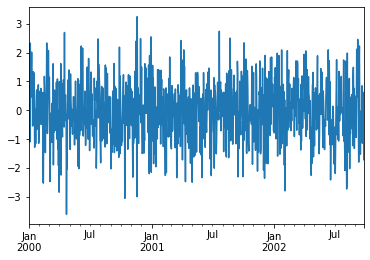

In [63]:
import matplotlib.pyplot as plt
ts = pd.Series(np.random.randn(1000),
                index=pd.date_range('1/1/2000', periods=1000))
ts.plot()


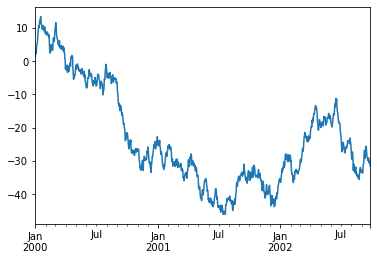

In [64]:
ts = ts.cumsum()
ts.plot()


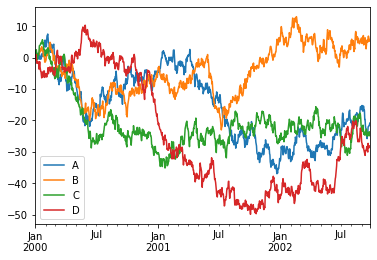

In [65]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                   columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
df.plot()

In [ ]:
df.to_csv('foo.csv')
df.to_excel('foo.xlsx', sheet_name='Sheet1')
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])


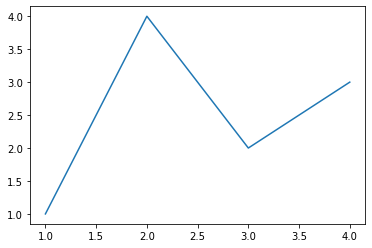

In [67]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.

<Figure size 432x288 with 0 Axes>

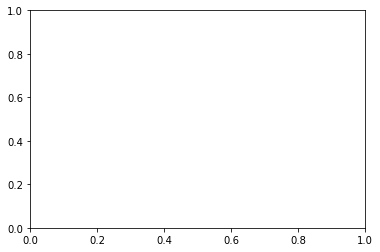

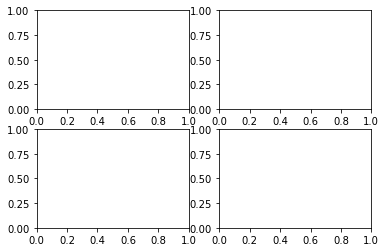

In [68]:
fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

In [70]:
import pandas
a = pandas.DataFrame(np.random.rand(4, 5), columns = list('abcde'))
a_asarray = a.values

In [71]:
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)

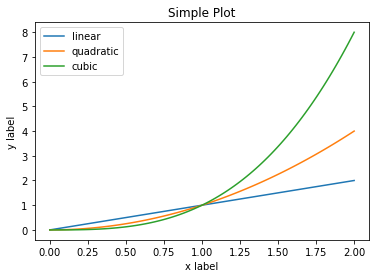

In [72]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

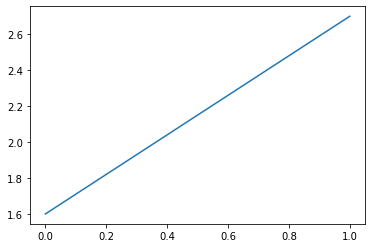

In [73]:
import matplotlib.pyplot as plt
plt.ion()
plt.plot([1.6, 2.7])

Text(0.5, 0, 'index')

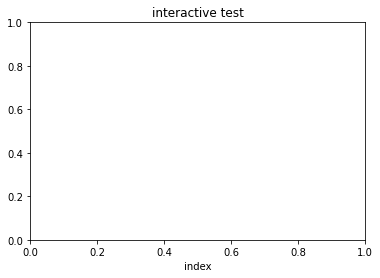

In [74]:
plt.title("interactive test")
plt.xlabel("index")

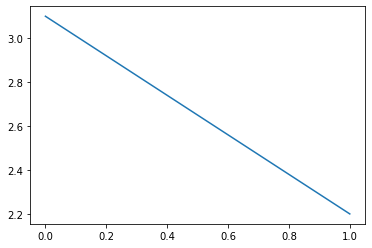

In [75]:
ax = plt.gca()
ax.plot([3.1, 2.2])
plt.draw()

In [76]:
plt.ioff()


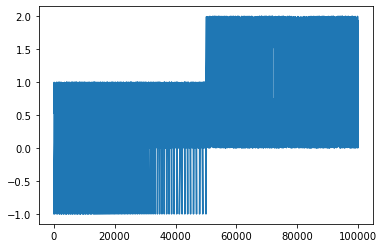

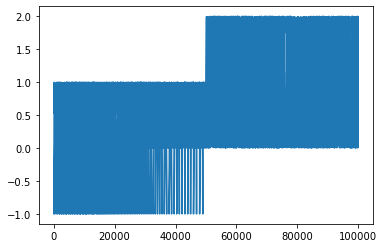

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['path.simplify_threshold'] = 1.0

# Setup, and create the data to plot
y = np.random.rand(100000)
y[50000:] *= 2
y[np.geomspace(10, 50000, 400).astype(int)] = -1
mpl.rcParams['path.simplify'] = True

mpl.rcParams['agg.path.chunksize'] = 0
plt.plot(y)
plt.show()

mpl.rcParams['agg.path.chunksize'] = 10000
plt.plot(y)
plt.show()